**Digit Dataset Clustering**

**Import dataset and dimensionality reduction(PCA and t-SNE)**

In [61]:
import pandas as pd 
 
df = pd.read_csv("/content/1632506945_4051344_image_new_test.csv",header=None) 

from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=72)
pca_result = pca.fit_transform(df)
principalDf = pd.DataFrame(data = pca_result )

#t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=8, n_iter=250)

output = tsne.fit_transform(principalDf)
op1 = pd.DataFrame(output)

import numpy as np
from scipy.spatial import distance




[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.082s...
[t-SNE] Computed neighbors for 10000 samples in 12.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 287.703515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.156288
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

**KMeans**

In [64]:
def kmeans(data,k, max_iter=50):

  k_points = np.random.choice(len(data), k, replace=False) #choosing random centroids

  centroids = data.iloc[k_points, :]
  distances = distance.cdist(data, centroids ,'cosine')
  points = np.array([np.argmin(i) for i in distances])
  for _ in range(max_iter):
    centroids = []
    for i in range(k):
      temp_cent = data.iloc[points==i].mean(axis=0)
      centroids.append(temp_cent)

    centroids = np.vstack(centroids)
    distances = distance.cdist(data, centroids ,'cosine')
    points = np.array([np.argmin(i) for i in distances])

  return points

op_kmeans = kmeans(op1,10,50)

#Saving onto output file
f=open('./HW3_part2_output.txt', 'w') 
f.writelines("%s \n"%i for i in op_kmeans)
f.close()

**Heat Plot for correlation of all columns in dataset**

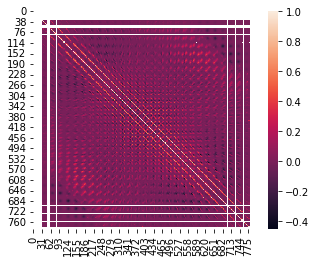

In [65]:
import seaborn as sns
col = df[df.columns] 
cor = col.corr() 
#heatmap
sns.heatmap(cor, square = True) 

**Scatter Plot For Clusters**

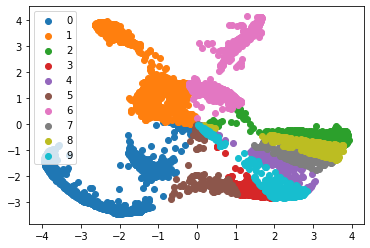

In [66]:
y = kmeans(op1,10,50)
import matplotlib.pyplot as plt
u_labels = np.unique(y)


for i in u_labels:
  plt.scatter(output[y == i , 0] , output[y == i , 1] , label = i)

plt.legend()

plt.show()

**Sum Of Squared Error**

In [ ]:
def sum_of_squared_error(y,y_bar):
  summation = 0  #variable to store the summation of differences
  n = len(y) #finding total number of items in list
  for i in range (1,n):
    difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
  return summation/n  #dividing summation by total values to obtain average
y = kmeans(df,10,50)
distortions = []
K = [2,4,6,8,10,12,14,16,18,20]
for k in K:
    kmeanModel2 = kmeans(df,k,50)    
    distortions.append(sum_of_squared_error(kmeanModel2,y))


**Elbow Curve**

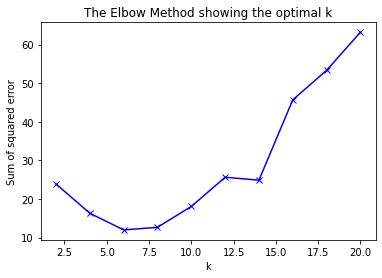

In [75]:
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method showing the optimal k')
plt.show()